## Importing required libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , AveragePooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras import backend

In [2]:
train_path = "train_pre/"
val_path = "val_pre/"
test_path = "test_pre/"

image_w = 128
image_h = 128
stride = (3,3)
pool = (2,2)
batch_size = 100
if backend.image_data_format() == "channels_first":
    input_shape = (3 , image_w , image_h)
else:
    input_shape = (image_w , image_h , 3)

## Training image augmentation and generation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
train_generator.class_indices

Found 1600 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
val_generator.class_indices

Found 16 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

## Testing image generation

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(image_w , image_h),
    batch_size=batch_size,
    class_mode="binary"
)
test_generator.class_indices

Found 350 images belonging to 2 classes.


{'NORMAL': 0, 'PNEUMONIA': 1}

## Creating the deep learning model

In [6]:
model = Sequential()

model.add( Conv2D(32 , stride , padding="same" , activation="relu" , input_shape=input_shape) )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(64 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Conv2D(128 , stride , padding="same" , activation="relu") )
model.add( MaxPooling2D(pool_size=pool) )

model.add( Flatten() )

model.add( Dropout(.5) )

model.add( Dense(512 , activation="relu") )

model.add( Dense(1 , activation="sigmoid") )

model.compile(optimizer="rmsprop" , loss="binary_crossentropy" , metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       1

## Fitting training data (batch size = 100)

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=50,
    validation_data=test_generator,
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - 47s 3s/step - loss: 0.8886 - accuracy: 0.6081 - val_loss: 0.4790 - val_accuracy: 0.7514
Epoch 2/50
16/16 [==============================] - 41s 3s/step - loss: 0.3635 - accuracy: 0.8544 - val_loss: 0.7669 - val_accuracy: 0.7229
Epoch 3/50
16/16 [==============================] - 39s 2s/step - loss: 0.3088 - accuracy: 0.8856 - val_loss: 0.4818 - val_accuracy: 0.8000
Epoch 4/50
16/16 [==============================] - 50s 3s/step - loss: 0.2595 - accuracy: 0.9019 - val_loss: 0.5216 - val_accuracy: 0.8457
Epoch 5/50
16/16 [==============================] - 46s 3s/step - loss: 0.2724 - accuracy: 0.9038 - val_loss: 0.4588 - val_accuracy: 0.8543
Epoch 6/50
16/16 [==============================] - 55s 3s/step - loss: 0.2178 - accuracy: 0.9231 - val_loss: 0.6278 - val_accuracy: 0.7971
Epoch 7/50
16/16 [==============================] - 65s 4s/step - loss: 0.2418 - acc

In [13]:
loss, acc = model.evaluate_generator(test_generator , verbose=1)
# model.save("unsharp_10epochs.h5")
loss , acc

Instructions for updating:
Please use Model.evaluate, which supports generators.
4/4 [==============================] - 3s 758ms/step - loss: 0.6030 - accuracy: 0.8600


(0.603015661239624, 0.8600000143051147)

## Plotting accuracy and loss

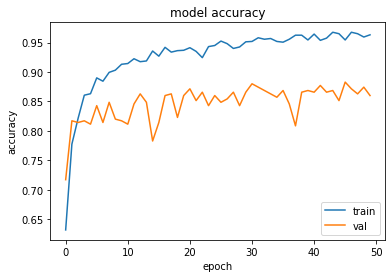

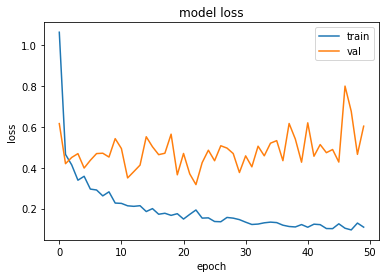

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig("pre_15pochs_acc.jpg")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("pre_15pochs_loss.jpg")
plt.show()